# preprocess

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

In [2]:
import pandas as pd
train_xy = pd.read_csv("./train_xy_discrete.csv",index_col=["cust_group","cust_id"])
X = train_xy.drop("y",axis=1).fillna(-1)
y = train_xy.y

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y,random_state=222)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)

# define metrics

In [4]:
import itertools
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,confusion_matrix,auc

## confusion matrix

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

## learning_curve

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
                    estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## model evaluation info

In [7]:
def eval_info(model,test_y,y_pred_prob,
                  cm,classes=y.unique(),normalize=False):
    print("------%s classification_report------\n" % model.__class__.__name__,
          classification_report(test_y,y_pred))
    
    plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    print("auc:",roc_auc_score(test_y,y_pred_prob))
#     print("auc(y_pred):",roc_auc_score(test_y,y_pred))
    fpr, tpr, thresholds = roc_curve(test_y,y_pred_prob,pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label='ROC curve' % auc(fpr, tpr),color='r')
    plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray',label='Luck')
    plt.title("%s ROC" % model.__class__.__name__)

# single model

## logistic

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.802709 
 best model: LogisticRegression(C=0.035, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)
------LogisticRegression classification_report------
              precision    recall  f1-score   support

          0       0.99      0.70      0.82      3541
          1       0.11      0.79      0.20       172

avg / total       0.95      0.71      0.79      3713

auc: 0.818299586898984
train_score: 0.7074878793320165 
 test_score: 0.7077834635065985
logistic model parameters shape: (1, 160) 
 count of non-zero elements: 61


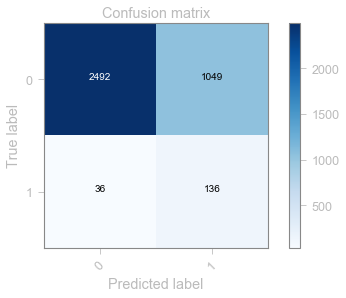

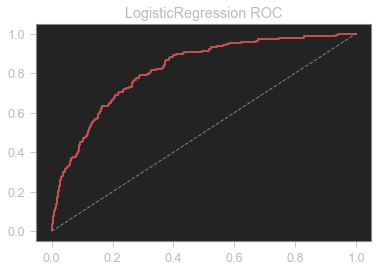

In [9]:
param_grid =  {
            'penalty':['l1'],#,'l2'],
            'C':[0.035],
#             'solver':['newton-cg','lbfgs','sag'],
            'solver':['saga'],#,'liblinear'],
            'max_iter':[350],
            'class_weight':['balanced'],
            'random_state':[666],      
}
# param_grid =  {
#             'penalty':['l1'],#'l2'],
#             'C':[0.035],
# #             'solver':['newton-cg','lbfgs','sag'],
# #             'solver':['saga','liblinear'],
#              'solver':['liblinear'],
#             'max_iter':[200],
#             'class_weight':['balanced'],
#             'random_state':[666],      
# }
LR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
LR.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (LR.best_score_, LR.best_estimator_))

LR_best = LR.best_estimator_
y_pred =LR_best.predict(test_x)
y_pred_prob = LR_best.predict_proba(test_x)[:,1]
train_score = LR_best.score(train_x,train_y)
test_score = LR_best.score(test_x,test_y)
cm = confusion_matrix(test_y,y_pred)

eval_info(LR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

print("logistic model parameters shape:",LR_best.coef_.shape,"\n",
     "count of non-zero elements:",np.count_nonzero(LR_best.coef_))

In [70]:
# save model
import pickle
with open("./best_models/LR_pkl.txt",'wb') as f:
    pickle.dump(LR_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
LR_cv_auc = cross_val_score(LR_best,X,y,cv=5,scoring="roc_auc")
print("best_LR_cv_auc",LR_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best_LR_cv_auc [0.80543747 0.82687873 0.80942799 0.79248482 0.81046117]


F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [71]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = LR_best.predict(test_all)
y_pred_prob = LR_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_LR.csv",header=True)

0    7900
1    2100
dtype: int64


## Decision Tree

best score: 0.740792 
 best model: DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=233,
            splitter='best')
------DecisionTreeClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.65      0.78      3541
          1       0.10      0.77      0.17       172

avg / total       0.94      0.65      0.75      3713

auc: 0.772386430058517
train_score: 0.6557730292691686 
 test_score: 0.6517640721788311


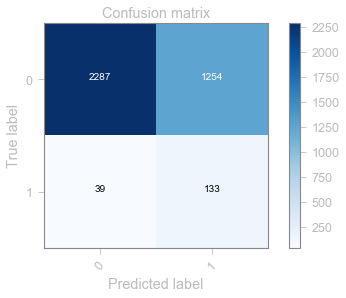

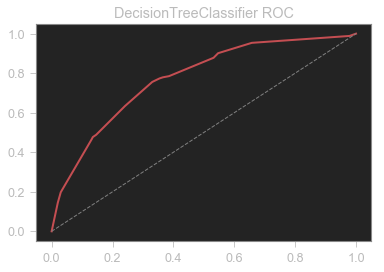

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"criterion":['gini'],
               "max_depth":[4],
                'max_features':[0.9],
#               "min_impurity_decrease":[0],
#              "min_samples_split":[2],
              "min_samples_leaf":[1], # 样本量不大不需管
#               "max_leaf_nodes":[19],
              "class_weight":["balanced"],
#               'min_weight_fraction_leaf':[0.04],
              'random_state':[233],
             }
DT = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=sfk,scoring='roc_auc')
DT.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (DT.best_score_, DT.best_estimator_))

DT_best = DT.best_estimator_
train_score = DT_best.score(train_x,train_y)
test_score = DT_best.score(test_x,test_y)
y_pred = DT_best.predict(test_x)
y_pred_prob = DT_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(DT_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [74]:
# save model
import pickle
with open("./best_models/DT_pkl.txt",'wb') as f:
    pickle.dump(DT_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
DT_cv_auc = cross_val_score(DT_best,X,y,cv=5,scoring="roc_auc")
print("best_DT_cv_auc:",DT_cv_auc)

best_DT_cv_auc: [0.726542   0.73438309 0.76924593 0.75697398 0.77645116]


In [75]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = DT_best.predict(test_all)
y_pred_prob = DT_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_DT.csv",header=True)

0    6513
1    3487
dtype: int64


## random forest

best score: 0.797349 
 best model: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=130, n_jobs=1, oob_score=False, random_state=222,
            verbose=0, warm_start=False)
------RandomForestClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.75      0.85      3541
          1       0.12      0.71      0.21       172

avg / total       0.94      0.75      0.82      3713

auc: 0.8122803964193535
train_score: 0.7480696713952235 
 test_score: 0.7457581470509023


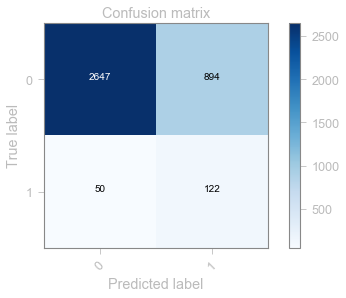

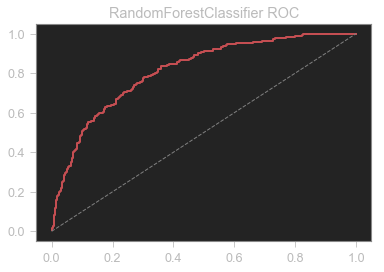

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
            'criterion':['entropy'],
            'n_estimators':[130],
            'class_weight':["balanced"],
#             'max_features':["sqrt"],
            'max_depth':[5],
#              "min_samples_split":[], # 样本量不大不需管
#               "min_samples_leaf":[], # 样本量不大不需管
#             "max_leaf_nodes":[13,15,20],
#             'min_impurity_decrease':[0],
#             'n_jobs':[-1],
            'random_state':[222],
             }

RF = GridSearchCV(RandomForestClassifier(),param_grid,cv=sfk,scoring='roc_auc')
RF.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (RF.best_score_, RF.best_estimator_))
RF_best = RF.best_estimator_
train_score = RF_best.score(train_x,train_y)
test_score = RF_best.score(test_x,test_y)
y_pred = RF_best.predict(test_x)
y_pred_prob = RF_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(RF_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [77]:
# save model
import pickle
with open("./best_models/RF_pkl.txt",'wb') as f:
    pickle.dump(RF_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
RF_cv_auc = cross_val_score(RF_best,X,y,cv=5,scoring="roc_auc")
print("best_RF_cv_auc:",RF_cv_auc)

best_RF_cv_auc: [0.78937931 0.81284831 0.8215067  0.77712105 0.80834714]


In [78]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = RF_best.predict(test_all)
y_pred_prob = RF_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_RF.csv",header=True)

0    7957
1    2043
dtype: int64


## extra tree

best score: 0.788101 
 best model: ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='entropy', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=1, oob_score=False, random_state=222,
           verbose=0, warm_start=False)
------ExtraTreesClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.69      0.81      3541
          1       0.11      0.77      0.19       172

avg / total       0.94      0.69      0.78      3713

auc: 0.8009907200042032
train_score: 0.6969950915838621 
 test_score: 0.6910853757069755


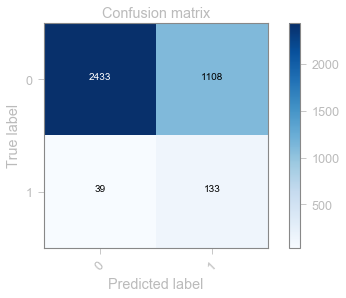

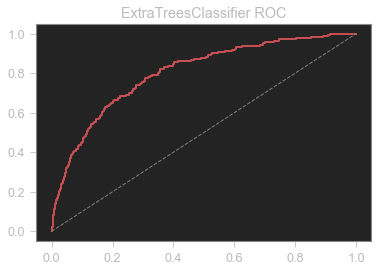

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
            'criterion':['entropy'],
            'n_estimators':[300],
            'class_weight':["balanced"],
#             'max_features':["sqrt"],
            'max_depth':[5],
#             'bootstrap':[True,False],
#              "min_samples_split":[], # 样本量不大不需管
#               "min_samples_leaf":[], # 样本量不大不需管
#             "max_leaf_nodes":[13,15,20],
#             'min_impurity_decrease':[0],
#             'n_jobs':[-1],
            'random_state':[222],
             }

ET = GridSearchCV(ExtraTreesClassifier(),param_grid,cv=sfk,scoring='roc_auc')
ET.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (ET.best_score_,ET.best_estimator_))

ET_best = ET.best_estimator_
train_score = ET_best.score(train_x,train_y)
test_score = ET_best.score(test_x,test_y)
y_pred = ET_best.predict(test_x)
y_pred_prob = ET_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(ET_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [80]:
# save model
import pickle
with open("./best_models/ET_pkl.txt",'wb') as f:
    pickle.dump(ET_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ET_cv_auc = cross_val_score(ET_best,X,y,cv=5,scoring="roc_auc")
print("best_ET_cv_auc:",ET_cv_auc)

best_ET_cv_auc: [0.80135003 0.81024346 0.81221063 0.78116103 0.79102651]


In [81]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = ET_best.predict(test_all)
y_pred_prob = ET_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_ET.csv",header=True)

0    7964
1    2036
dtype: int64


## SVM

In [10]:
# svm_train_xy = pd.read_csv("F:./resample data/under_resample1.csv",index_col=['cust_id'])
# svm_y = svm_train_xy.y
# svm_X = svm_train_xy.drop('y',axis=1)
# svm_train_x,svm_test_x,svm_train_y,svm_test_y = train_test_split(svm_X,svm_y,stratify=svm_y)
# sfk = StratifiedKFold(n_splits=3)

best score: 0.690134 
 best model: SVC(C=0.5, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=True, random_state=520, shrinking=True,
  tol=0.001, verbose=False)
------SVC classification_report------
              precision    recall  f1-score   support

          0       0.96      0.96      0.96      3541
          1       0.12      0.12      0.12       172

avg / total       0.92      0.92      0.92      3713

auc: 0.722069708333607
train_score: 0.9735140958879511 
 test_score: 0.9194721249663345


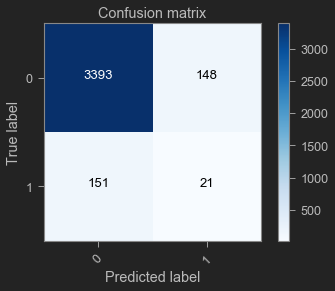

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
            'C':[0.5],
            'kernel':['rbf'],
            'class_weight':["balanced"],
            'gamma':[0.03],
#             'shrinking':[True],
            'probability':[True],
            'random_state':[520],
             }

SVC = GridSearchCV(SVC(),param_grid,cv=sfk,scoring='roc_auc')
SVC.fit(train_x,train_y)
print("best score: %f \n best model: %s" % (SVC.best_score_, SVC.best_estimator_))
SVC_best = SVC.best_estimator_
train_score = SVC_best.score(train_x,train_y)
test_score = SVC_best.score(test_x,test_y)
y_pred = SVC_best.predict(test_x)
y_pred_prob = SVC_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(SVC_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [83]:
# save model
import pickle
with open("./best_models/SVM_pkl.txt",'wb') as f:
    pickle.dump(SVC_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
SVC_cv_auc = cross_val_score(SVC_best,X,y,cv=5,scoring="roc_auc")
print("best_SVC_cv_auc",SVC_cv_auc)

best_SVC_cv_auc [0.73086348 0.72610346 0.71560673 0.68811788 0.753077  ]


## xgb-sklearn

best score: 0.803647 
 best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.05, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=-1,
       n_estimators=145, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=7,
       reg_lambda=5, scale_pos_weight=20.669260700389106, seed=None,
       silent=True, subsample=0.8)


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------XGBClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.74      0.84      3541
          1       0.12      0.74      0.21       172

avg / total       0.94      0.74      0.82      3713

auc: 0.8240527902379436
train_score: 0.7442090141856706 
 test_score: 0.7401023431187719


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


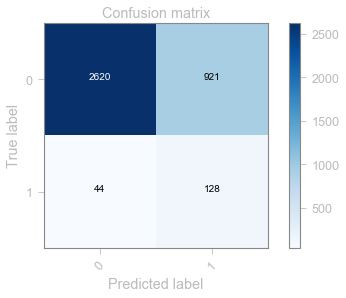

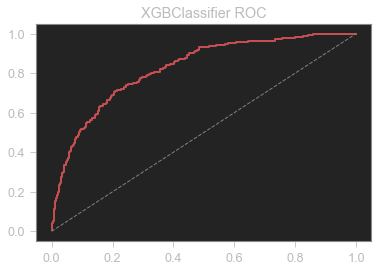

In [15]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'booster':['gbtree'],
    'objective': ['binary:logistic'],
    'n_estimators':[145],
    'max_depth':[3],
    'learning_rate':[0.05],
    'min_child_weight':[5],
    'gamma':[0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.6],
    'reg_alpha': [7],
    'reg_lambda': [5],
    'scale_pos_weight':[float(len(train_y)-sum(train_y))/float(sum(train_y))],
    'random_state':[0],
#     'n_jobs': [-1],
    'missing': [-1],
    'silent':[True],
}

XGB = GridSearchCV(XGBClassifier(),param_grid,cv=sfk,scoring='roc_auc')#,iid=False)
XGB.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (XGB.best_score_, XGB.best_estimator_))

XGB_best = XGB.best_estimator_
y_pred = XGB_best.predict(test_x)
y_pred_prob = XGB_best.predict_proba(test_x)[:,1]
train_score = XGB_best.score(train_x,train_y)
test_score = XGB_best.score(test_x,test_y)
cm = confusion_matrix(test_y,y_pred)

eval_info(XGB_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [85]:
# save model
import pickle
with open("./best_models/XGB_pkl.txt",'wb') as f:
    pickle.dump(XGB_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
XGB_cv_auc = cross_val_score(XGB_best,X,y,cv=5,scoring="roc_auc")
print("best_XGB_cv_auc:",XGB_cv_auc)

best_XGB_cv_auc: [0.81029226 0.83021532 0.82612124 0.79244617 0.82930066]


In [86]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = XGB_best.predict(test_all)
y_pred_prob = XGB_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_XGB.csv",header=True)

0    9004
1     996
dtype: int64


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## xgb:raw interface

[0]	train-auc:0.744016
Will train until train-auc hasn't improved in 304 rounds.
[60]	train-auc:0.835221
[120]	train-auc:0.849172
[180]	train-auc:0.859664
[240]	train-auc:0.869442
[300]	train-auc:0.878779
[360]	train-auc:0.887106
[420]	train-auc:0.894607
[480]	train-auc:0.901672
[540]	train-auc:0.908075
[599]	train-auc:0.913946
------Booster classification_report------
              precision    recall  f1-score   support

          0       0.98      0.72      0.83      3541
          1       0.12      0.76      0.21       172

avg / total       0.94      0.73      0.81      3713

auc: 0.8229395847973572


<module 'matplotlib.pyplot' from 'F:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

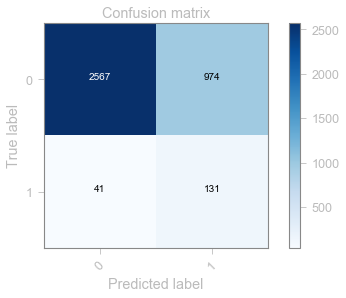

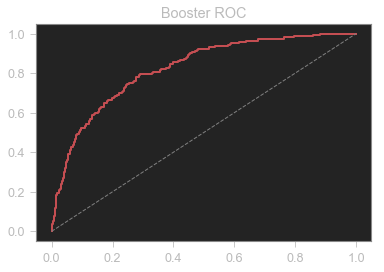

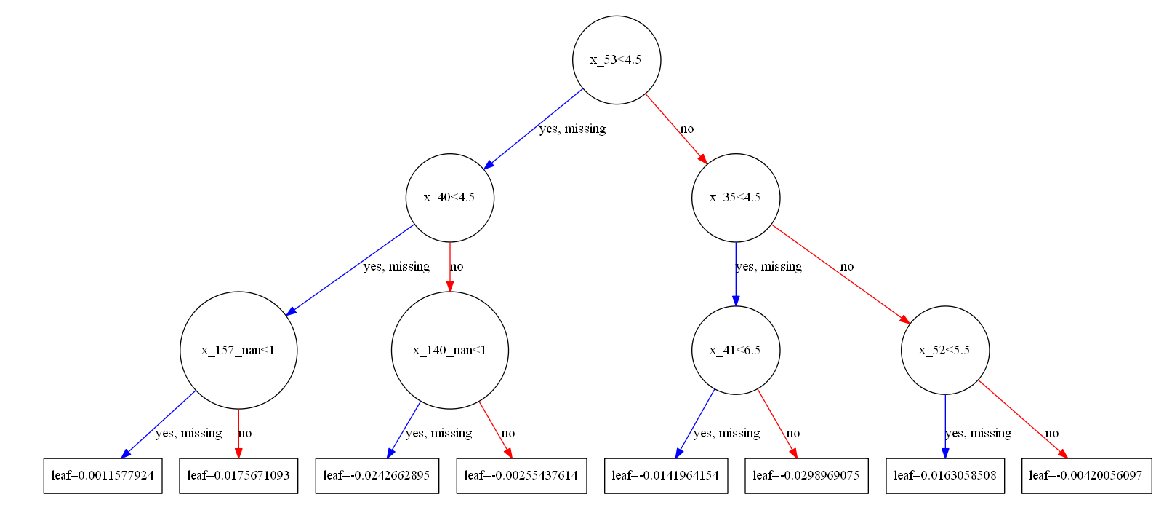

In [16]:
import xgboost as xgb
dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)

params = {
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'auc',
            'gamma':0.05,
            'max_depth':3,
            'alpha':7,
            'lambda':5,
            'subsample':0.8,
            'colsample_bytree':0.6,
            'min_child_weight':5, 
            'eta': 0.02,
            'seed':0,
            'silent':1,
            'missing':-1,
        }
# xgb_cv = xgb.cv(params, dtrain, 
#            num_boost_round=1000, 
#            nfold=3, stratified=True,#folds=sfk
#            metrics='auc', maximize=True, 
#            early_stopping_rounds=500, 
#            as_pandas=True, verbose_eval=1, 
#            show_stdv=False, seed=0, shuffle=True)
xgb_model = xgb.train(params,dtrain,num_boost_round=600,early_stopping_rounds=304,
                       evals=[(dtrain,"train")],verbose_eval=60,maximize=True)
y_pred_prob = xgb_model.predict(dtest,ntree_limit=304)
y_pred = np.where(y_pred_prob>0.5,1,0)

cm = confusion_matrix(test_y,y_pred)
eval_info(xgb_model,test_y,y_pred_prob,cm)

# xgb.plot_importance(xgb_model,max_num_features=20)
plt.figure(figsize=(20,20))
xgb.plot_tree(xgb_model,ax=plt,num_trees=5)

## GBDT

best score: 0.797849 
 best model: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=4,
              max_features=0.7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=145,
              presort='auto', random_state=1, subsample=0.8, verbose=0,
              warm_start=False)
------GradientBoostingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3541
          1       0.44      0.02      0.04       172

avg / total       0.93      0.95      0.93      3713

auc: 0.8126448973158285
train_score: 0.957981684323936 
 test_score: 0.9534069485591166


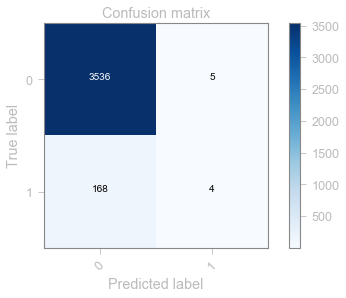

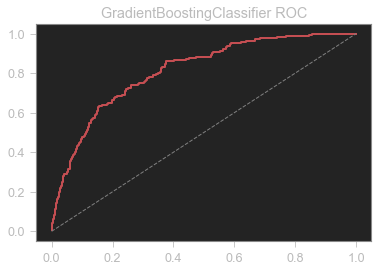

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
        'loss':['deviance'],
        'n_estimators':[145],
        'max_depth':[4],
        'learning_rate':[0.03],
#         'criterion':['friedman_mse'],#默认
        'subsample': [0.8],
        'max_features':[0.7],
#         "max_leaf_nodes":[8],
#         'min_impurity_decrease':[0],
        'random_state':[1],
}

GBDT = GridSearchCV(GradientBoostingClassifier(),param_grid,cv=sfk,scoring='roc_auc')
GBDT.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (GBDT.best_score_,GBDT.best_estimator_))

GBDT_best = GBDT.best_estimator_

train_score = GBDT_best.score(train_x,train_y)
test_score = GBDT_best.score(test_x,test_y)
y_pred = GBDT_best.predict(test_x)
y_pred_prob = GBDT_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(GBDT_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [88]:
# save model
import pickle
with open("./best_models/GBDT_pkl.txt",'wb') as f:
    pickle.dump(GBDT_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
GBDT_cv_auc = cross_val_score(GBDT_best,X,y,cv=5,scoring="roc_auc")
print("best_XGB_cv_auc:",GBDT_cv_auc)

best_XGB_cv_auc: [0.7978023  0.82175404 0.81778105 0.7931341  0.82255791]


In [89]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = GBDT_best.predict(test_all)
y_pred_prob = GBDT_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_GBDT.csv",header=True)

0    9995
1       5
dtype: int64


## MLP

best score: 0.798165 
 best model: MLPClassifier(activation='logistic', alpha=0.012, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=888,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
------MLPClassifier classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3541
          1       1.00      0.01      0.01       172

avg / total       0.96      0.95      0.93      3713

auc: 0.8141964889697431
train_score: 0.95426792769065 
 test_score: 0.95426792769065


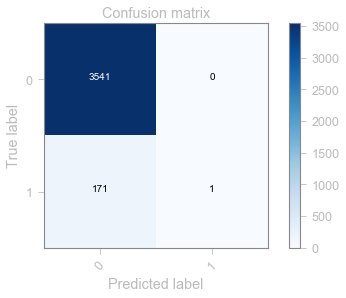

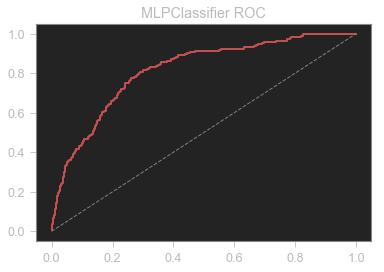

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes':[(300,)],
    'activation':['logistic'],#'relu'],
    'solver':['adam'],
#     'Note':
    'alpha':[0.012],
#     'batch_size':
    'learning_rate':['constant'],
#     'learning_rate_init':
#     'power_t':
#     'max_iter':
#     'shuffle':
    'random_state':[888],
#     'tol':
#     'verbose':
#     'warm_start':
    'momentum':[0.9],
#     'nesterovs_momentum':
#     'early_stopping':
#     'validation_fraction':
#     'beta_1':
#     'beta_2':
#     'epsilon':
}

MLP = GridSearchCV(MLPClassifier(),param_grid,cv=sfk,scoring='roc_auc')
MLP.fit(train_x,train_y)
print("best score: %f \n best model: %s" % (MLP.best_score_, MLP.best_estimator_))
MLP_best = MLP.best_estimator_
train_score = MLP_best.score(train_x,train_y)
test_score = MLP_best.score(train_x,train_y)
y_pred = MLP_best.predict(test_x)
y_pred_prob = MLP_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(MLP_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

In [91]:
# save model
import pickle
with open("./best_models/MLP_pkl.txt",'wb') as f:
    pickle.dump(MLP_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
MLP_cv_auc = cross_val_score(MLP_best,X,y,cv=5,scoring="roc_auc")
print("best_MLP_cv_auc:",MLP_cv_auc)

best_MLP_cv_auc: [0.81359444 0.83029261 0.8166783  0.79646554 0.81310983]


In [92]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = MLP_best.predict(test_all)
y_pred_prob = MLP_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_MLP.csv",header=True)

0    10000
dtype: int64


# adaboost

best score: 0.788638 
 best model: AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=130, n_jobs=1, oob_score=False, random_state=222,
            verbose=0, warm_start=False),
          learning_rate=0.05, n_estimators=270, random_state=999)
------AdaBoostClassifier classification_report------
              precision    recall  f1-score   support

          0       0.97      0.85      0.91      3541
          1       0.15      0.55      0.23       172

avg / total       0.94      0.83      0.87      3713

auc: 0.8099801002213276
train_score: 0.853205243311187 
 test_score: 0.8324804740102343


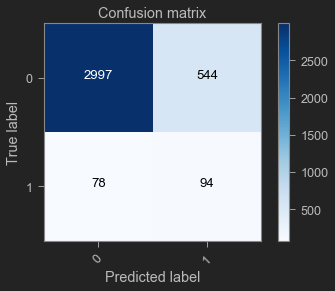

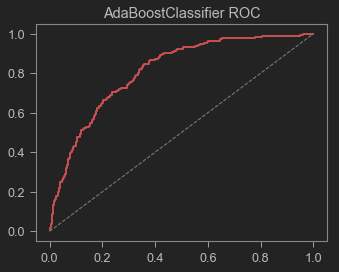

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator':[RF_best],
    'n_estimators':[270],
    'learning_rate':[0.05],
    'random_state':[999],
}

ADAB = GridSearchCV(AdaBoostClassifier(),param_grid,cv=sfk,scoring="roc_auc")
ADAB.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (ADAB.best_score_,ADAB.best_estimator_))

ADAB_best = ADAB.best_estimator_
train_score = ADAB_best.score(train_x,train_y)
test_score = ADAB_best.score(test_x,test_y)
y_pred = ADAB_best.predict(test_x)
y_pred_prob = ADAB_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(ADAB_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [142]:
# save model
import pickle
with open("./best_models/ADAB_RF_pkl.txt",'wb') as f:
    pickle.dump(ADAB_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
ADAB_cv_auc = cross_val_score(ADAB_best,X,y,cv=5,scoring="roc_auc")
print("best_ADAB_cv_auc:",ADAB_cv_auc)

best_ADAB_cv_auc: [0.8104355  0.82646391 0.82957119 0.7907972  0.81782743]


In [143]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = ADAB_best.predict(test_all)
y_pred_prob = ADAB_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_ADAB_RF.csv",header=True)

0    9448
1     552
dtype: int64


# bagging xgb_best

------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.80      0.88      3541
          1       0.14      0.66      0.23       172

avg / total       0.94      0.79      0.85      3713

auc: 0.8135610752448067
train_score: 0.8086914880881121 
 test_score: 0.7947751144626987


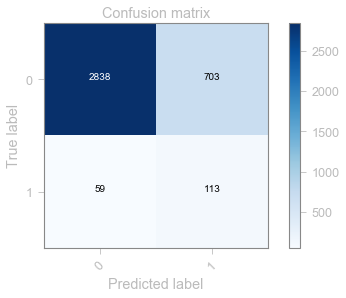

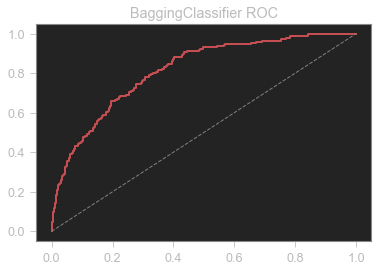

In [130]:
from sklearn.ensemble import BaggingClassifier

bagging_xgb = BaggingClassifier(XGB_best,n_estimators=10)
bagging_xgb.fit(train_x,train_y)

train_score =bagging_xgb.score(train_x,train_y)
test_score = bagging_xgb.score(test_x,test_y)
y_pred = bagging_xgb.predict(test_x)
y_pred_prob = bagging_xgb.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(bagging_xgb,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# bagging xgb:sklearn(vary params)

------XGBClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.75      0.85      3541
          1       0.12      0.73      0.21       172

avg / total       0.94      0.75      0.82      3713

auc: 0.8215620341120298


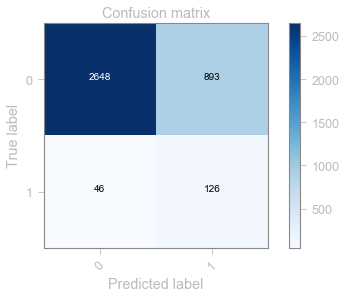

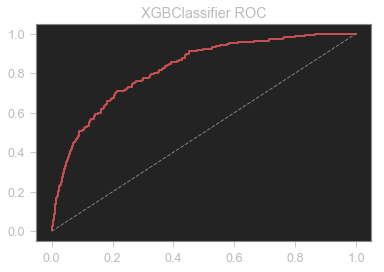

In [21]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [142,145,148] 
max_depth = [2,3,4] 
learning_rate = np.linspace(0.045,0.055,10) 
min_child_weight= [5,4,6] 
gamma = np.linspace(0.045,0.055,10)
subsample = [0.7,0.75,0.8,0.85]
colsample_bytree = [0.6,0.65,0.7,0.75]
reg_alpha =[6,7,8]
reg_lambda = [4,5,6]
random_state = np.arange(1000,10000,100)

np.random.shuffle(n_estimators)
np.random.shuffle(max_depth)
np.random.shuffle(learning_rate)
np.random.shuffle(min_child_weight)
np.random.shuffle(gamma)
np.random.shuffle(subsample)
np.random.shuffle(colsample_bytree)
np.random.shuffle(reg_alpha)
np.random.shuffle(reg_lambda)
np.random.shuffle(random_state)

prob_df = pd.DataFrame([],index=test_x.index)
for i in range(30):
    param_grid = {
        'booster':'gbtree',
        'objective': 'binary:logistic',
        'n_estimators':n_estimators[i%3],
        'max_depth':max_depth[i%3],
        'learning_rate':learning_rate[i%10],
        'min_child_weight':min_child_weight[i%3],
        'gamma':gamma[i%10],
        'subsample':subsample[i%4],
        'colsample_bytree': colsample_bytree[i%4],
        'reg_alpha':reg_alpha[i%3],
        'reg_lambda': reg_lambda[i%3],
        'scale_pos_weight':float(len(train_y)-sum(train_y))/float(sum(train_y)),
        'random_state':random_state[i],
#     'n_jobs': [-1],
        'missing': -1,
        'silent':True,
    }

#     bagging_xgb = BaggingClassifier(XGBClassifier().set_params(**param_grid),n_estimators=10)
    # bagging_xgb = BaggingClassifier(XGB_best,n_estimators=10)
#     bagging_xgb.fit(train_x,train_y)
    xgb_ = XGBClassifier().set_params(**param_grid)
    xgb_.fit(train_x,train_y)
    y_prob = xgb_.predict_proba(test_x)[:,1]
    y_prob_s = pd.Series(y_prob,index=test_x.index)
    prob_df = pd.concat([prob_df,y_prob_s],axis=1)

y_pred_prob = prob_df.mean(axis=1)
y_pred = (y_pred_prob>0.5)*1

cm = confusion_matrix(test_y,y_pred)
eval_info(xgb_,test_y,y_pred_prob,cm)

# print( "train_score:",train_score,"\n","test_score:",test_score)

# xgb+lr

[0]	train-auc:0.744016
Will train until train-auc hasn't improved in 304 rounds.
[20]	train-auc:0.826183
[40]	train-auc:0.83049
[60]	train-auc:0.835221
[80]	train-auc:0.8413
[100]	train-auc:0.84524
[120]	train-auc:0.849172
[140]	train-auc:0.852725
[160]	train-auc:0.856096
[180]	train-auc:0.859664
[200]	train-auc:0.863039
[220]	train-auc:0.866393
[240]	train-auc:0.869442
[260]	train-auc:0.872637
[280]	train-auc:0.875359
[300]	train-auc:0.878779
[320]	train-auc:0.882228
[340]	train-auc:0.884666
[360]	train-auc:0.887106
[380]	train-auc:0.889782
[400]	train-auc:0.892154
[420]	train-auc:0.894607
[440]	train-auc:0.897249
[460]	train-auc:0.899479
[480]	train-auc:0.901672
[499]	train-auc:0.903976
best score: 0.897672 
 best model: LogisticRegression(C=0.06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=80,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=666,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
-

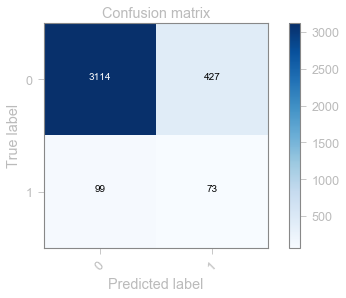

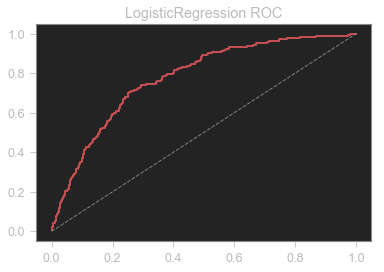

In [22]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

dtrain = xgb.DMatrix(train_x,label=train_y)
dtest = xgb.DMatrix(test_x)
one_hot = OneHotEncoder()

params = {
            'booster':'gbtree',
            'objective': 'binary:logistic',
            'scale_pos_weight': float(len(train_y)-sum(train_y))/float(sum(train_y)),
            'eval_metric': 'auc',
            'gamma':0.05,
            'max_depth':3,
            'alpha':7,
            'lambda':5,
            'subsample':0.8,
            'colsample_bytree':0.6,
            'min_child_weight':5, 
            'eta': 0.02,
            'seed':0,
            'silent':1,
            'missing':-1,
        }

xgb_model = xgb.train(params,dtrain,num_boost_round=500,early_stopping_rounds=304,
                       evals=[(dtrain,"train")],verbose_eval=20,maximize=True)

train_leaf = xgb_model.predict(dtrain,ntree_limit=304,pred_leaf=True)
test_leaf = xgb_model.predict(dtest,ntree_limit=304,pred_leaf=True)

train_leaf_hot = one_hot.fit_transform(train_leaf)
test_leaf_hot = one_hot.transform(test_leaf)
     

param_grid =  {
            'penalty':['l2'],
            'C':[0.06],
            'solver':['lbfgs'],#['newton-cg','sag'],#l2
#             'solver':['liblinear'],#,'saga',],#l1
            'max_iter':[80],
            'class_weight':['balanced'],
#             'fit_intercept':[True],
            'random_state':[666],      
}

xgbLR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
xgbLR.fit(train_leaf_hot,train_y)

print("best score: %f \n best model: %s" % (xgbLR.best_score_,xgbLR.best_estimator_))
xgbLR_best = xgbLR.best_estimator_

train_score = xgbLR_best.score(train_leaf_hot,train_y)
test_score = xgbLR_best.score(test_leaf_hot,test_y)
y_pred = xgbLR_best.predict(test_leaf_hot)
y_pred_prob = xgbLR_best.predict_proba(test_leaf_hot)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(xgbLR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# bagging dt

best score: 0.791801 
 best model: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=233,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.8, n_estimators=80, n_jobs=1, oob_score=False,
         random_state=777, verbose=0, warm_start=False)
------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.73      0.84      3541
          1       0.11      0.69      0.19       172

avg / total       0.94      0.73      0.81      3713

auc: 0.7959246501119774
train_score: 0.732910331617383 
 test_score: 0.7285214112577431


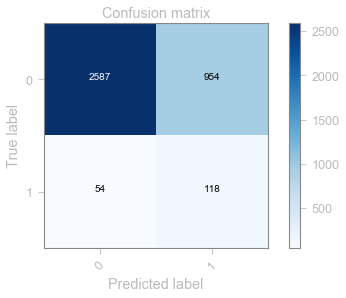

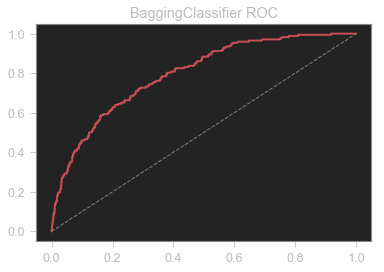

In [132]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'base_estimator':[DT_best],#LR_best,SVC_best,GBDT_best],
    'n_estimators':[80],
    'max_samples':[0.8],
    'max_features':[0.7],
    'random_state':[777],
}

BAGG = GridSearchCV(BaggingClassifier(),param_grid,cv=sfk,scoring="roc_auc")
BAGG.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (BAGG.best_score_,BAGG.best_estimator_))
BAGG_best = BAGG.best_estimator_
train_score = BAGG_best.score(train_x,train_y)
test_score = BAGG_best.score(test_x,test_y)
y_pred = BAGG_best.predict(test_x)
y_pred_prob = BAGG_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(BAGG_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# bagging lr

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.800354 
 best model: BaggingClassifier(base_estimator=LogisticRegression(C=0.035, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=777, verbose=0, warm_start=False)
------BaggingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.98      0.74      0.84      3541
          1       0.12      0.75      0.21       172

avg / total       0.94      0.74      0.81      3713

auc: 0.8190335143797245
train_score: 0.736667265218172 
 test_score: 0.7374091031510908


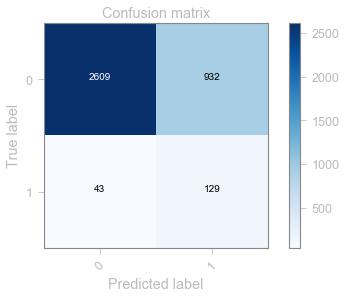

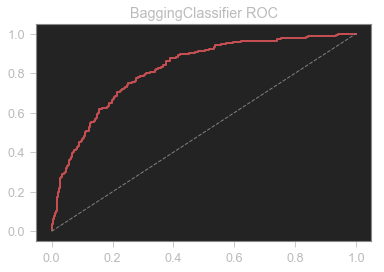

In [24]:
from sklearn.ensemble import BaggingClassifier
param_grid = {
    'base_estimator':[LR_best],#SVC_best,GBDT_best],
#     'n_estimators':[80],
#     'max_samples':[0.8],
#     'max_features':[0.7],
    'random_state':[777],
}

BAGG = GridSearchCV(BaggingClassifier(),param_grid,cv=sfk,scoring="roc_auc")
BAGG.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (BAGG.best_score_,BAGG.best_estimator_))
BAGG_best = BAGG.best_estimator_
train_score = BAGG_best.score(train_x,train_y)
test_score = BAGG_best.score(test_x,test_y)
y_pred = BAGG_best.predict(test_x)
y_pred_prob = BAGG_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(BAGG_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# voting 

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.806067 
 best model: VotingClassifier(estimators=[('lr', LogisticRegression(C=0.035, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=350,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)), ('mlp', MLPC...         presort='auto', random_state=1, subsample=0.8, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[3, 5, 1.7, 1.7, 6, 5])


F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


------VotingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      3541
          1       0.33      0.24      0.28       172

avg / total       0.93      0.94      0.94      3713

auc: 0.8179531468577396
train_score: 0.9522327307554173 
 test_score: 0.9415566927013197


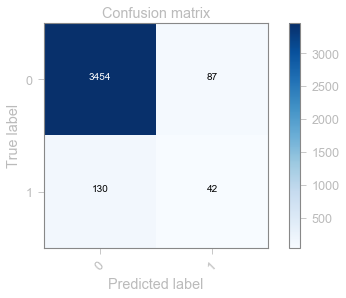

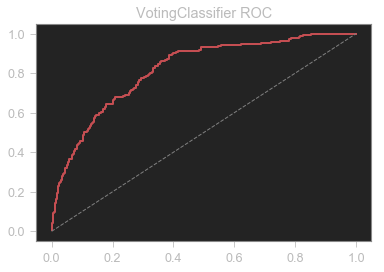

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grid ={
    'voting':['soft'],
    'weights':[
#                [2,5,1,1,6,5],
               [3,5,1.7,1.7,6,5]
                
    ]
}

estimators = [ ('lr', LR_best),('mlp',MLP_best), 
               ('rf', RF_best),('et', ET_best) ,
               ('xgb',XGB_best),('gbdt',GBDT_best)
             ]

voting =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting.best_score_,voting.best_estimator_))
voting_best = voting.best_estimator_
train_score = voting_best.score(train_x,train_y)
test_score = voting_best.score(test_x,test_y)
y_pred = voting_best.predict(test_x)
y_pred_prob = voting_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [ ]:
auc: 0.8318320931546075
train_score: 0.9525947207757227 
test_score: 0.9429033126851603

auc: 0.8244337100937194
train_score: 0.9475668881307237 
test_score: 0.9396714247239429

In [98]:
# save model
import pickle
with open("./best_models/voting_pkl.txt",'wb') as f:
    pickle.dump(voting_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
voting_cv_auc = cross_val_score(voting_best,X,y,cv=5,scoring="roc_auc")
print("best_voting_cv_auc:",voting_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best_voting_cv_auc: [0.81424925 0.83561827 0.82768003 0.80047202 0.82719307]


In [99]:
# predict
test_all = pd.read_csv("./another data/test_all_clean.csv",index_col=['cust_group','cust_id'])
y_pred = voting_best.predict(test_all)
y_pred_prob = voting_best.predict_proba(test_all)[:,1]

print(pd.Series(y_pred).value_counts())
pred_result = pd.Series(y_pred_prob,index=test_all.index.get_level_values(level=1),name="pred_prob")
pred_result.index.name = "cust_id"
pred_result.sort_index().to_csv("./predict/pred_result_voting.csv",header=True)

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    9969
1      31
dtype: int64


F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


best score: 0.806820 
 best model: VotingClassifier(estimators=[('xgb', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.05, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=5, missing=-1,
       n_estimators=145, n_jobs=1, nthread=None,
       objective='binary:logist... penalty='l1', random_state=666,
          solver='saga', tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[1, 2, 4, 4, 3])
------VotingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.96      0.98      0.97      3541
          1       0.25      0.12      0.16       172

avg / total       0.93      0.94      0.93      3713

auc: 0.8227310640142385
train_score: 0.9517866762434908 
 test_score: 0.9426339886883921


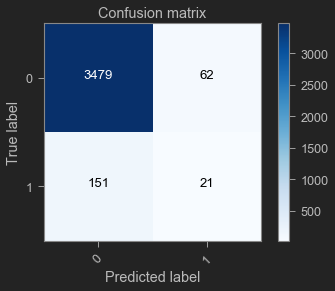

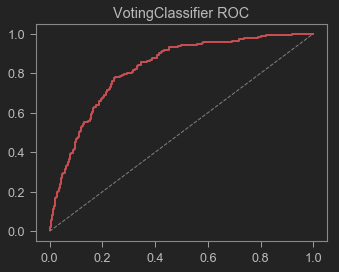

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
param_grid ={
    'voting':['soft'],
    'weights':[
               [1,2,4,4,3],
    ]
}

estimators = [ ('xgb', XGB_best),('bagging_xgb', bagging_xgb),
              ('mlp',MLP_best),('gbdt',GBDT_best),('lr',LR_best)
             ]

voting =GridSearchCV(VotingClassifier(estimators),param_grid,cv=sfk,scoring="roc_auc")
voting.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (voting.best_score_,voting.best_estimator_))
voting_best = voting.best_estimator_
train_score = voting_best.score(train_x,train_y)
test_score = voting_best.score(test_x,test_y)
y_pred = voting_best.predict(test_x)
y_pred_prob = voting_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(voting_best,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

# stacking

F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


------StackingClassifier classification_report------
              precision    recall  f1-score   support

          0       0.96      1.00      0.98      3541
          1       0.44      0.07      0.12       172

avg / total       0.93      0.95      0.94      3713

auc: 0.8188841018500883
train_score: 0.9571411468933317 
 test_score: 0.9528683005655804


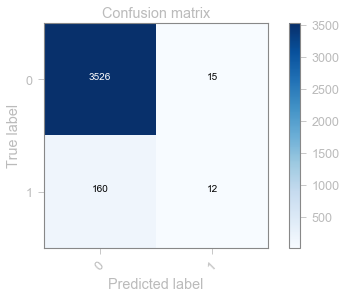

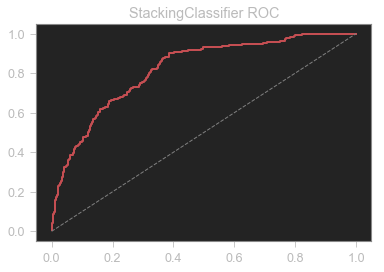

In [125]:
from mlxtend.classifier import StackingClassifier

meta_classifier = LogisticRegression()#.set_params(**LR_best.get_params())
classifiers = [LR_best,bagging_xgb,XGB_best,MLP_best,GBDT_best]
# ET_best,RF_best,
# voting_best,
stacking = StackingClassifier(classifiers=classifiers,meta_classifier=meta_classifier,
                             use_probas = True,average_probas=True) #
stacking.fit(train_x,train_y)
train_score = stacking.score(train_x,train_y)
test_score = stacking.score(test_x,test_y)
y_pred = stacking.predict(test_x)
y_pred_prob = stacking.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(stacking,test_y,y_pred_prob,cm)
print("train_score:",train_score,"\n","test_score:",test_score)

In [ ]:
LR_best:
auc: 0.816715157326468
train_score: 0.8226984317011852 
test_score: 0.8058173983301912

LR:
auc: 0.8123263695053953
train_score: 0.9649227822339279 
test_score: 0.9466738486399138

LR:average
auc: 0.8172586248793205
train_score: 0.956303124625883 
test_score: 0.9528683005655804
    
LR_best:average
auc: 0.8165329068782305
train_score: 0.4683347300371124 
test_score: 0.4635065984379208

## plot decision boundary

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
F:\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
F:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth va

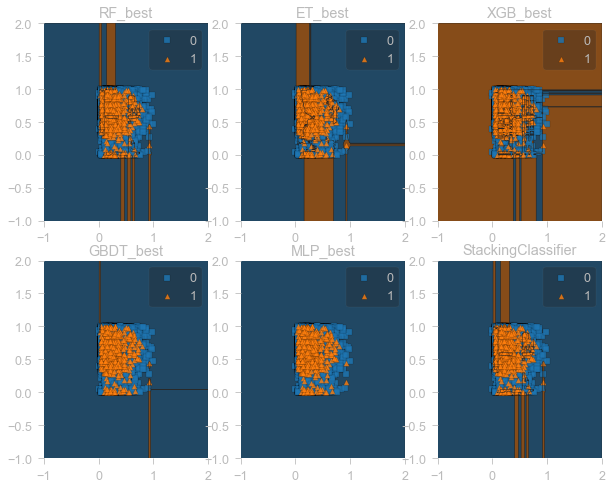

In [71]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

fig = plt.figure(figsize=(10,8))
c = 0
for clf, lab in zip([RF_best, ET_best, XGB_best,GBDT_best,MLP_best,stacking], 
                    ['RF_best','ET_best','XGB_best','GBDT_best','MLP_best','StackingClassifier']):
    c += 1 
    clf.fit(train_xy.iloc[:,1:3].values, y.values)
    plt.subplot(2,3,c)
    fig = plot_decision_regions(X=train_xy.iloc[:,1:3].values, y=y.values, clf=clf)
    plt.title(lab)

In [72]:
help(stacking)

Help on StackingClassifier in module mlxtend.classifier.stacking_classification object:

class StackingClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin, sklearn.base.TransformerMixin)
 |  A Stacking classifier for scikit-learn estimators for classification.
 |  
 |  Parameters
 |  ----------
 |  classifiers : array-like, shape = [n_classifiers]
 |      A list of classifiers.
 |      Invoking the `fit` method on the `StackingClassifer` will fit clones
 |      of these original classifiers that will
 |      be stored in the class attribute
 |      `self.clfs_`.
 |  meta_classifier : object
 |      The meta-classifier to be fitted on the ensemble of
 |      classifiers
 |  use_probas : bool (default: False)
 |      If True, trains meta-classifier based on predicted probabilities
 |      instead of class labels.
 |  average_probas : bool (default: False)
 |      Averages the probabilities as meta features if True.
 |  verbose : int, optional (default=0)
 |      Controls 

# GBDT+LR

best score: 0.794528 
 best model: LogisticRegression(C=0.03, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=50,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=666,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
------LogisticRegression classification_report------
              precision    recall  f1-score   support

          0       0.98      0.72      0.83      3541
          1       0.11      0.69      0.19       172

avg / total       0.94      0.72      0.80      3713

auc: 0.7914866054130025
train_score: 0.7199281867145422 
 test_score: 0.7220576353353084


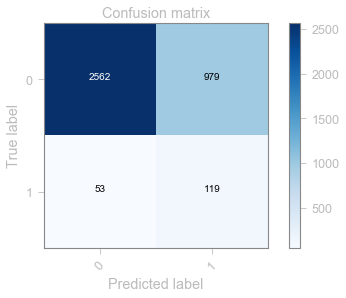

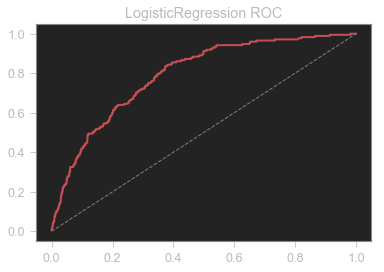

In [29]:
train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
train_x,train_x_lr,train_y,train_y_lr = train_test_split(train_x,train_y,stratify=train_y)

from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

GBDT_best.fit(train_x,train_y)
one_hot.fit(GBDT_best.apply(train_x)[:,:,0])
train_x_lr = one_hot.transform(GBDT_best.apply(train_x_lr)[:,:,0])
test_x_lr = one_hot.transform(GBDT_best.apply(test_x)[:,:,0])
                               
param_grid =  {
            'penalty':['l1'],#'l2'],
            'C':[0.06],
#             'solver':['newton-cg','lbfgs','sag'],#l2
            'solver':['liblinear'],#,'saga',],#l1
            'max_iter':[50],
            'class_weight':['balanced'],
#             'fit_intercept':[True],
            'random_state':[666],      
}

GBLR = GridSearchCV(LogisticRegression(),param_grid,cv=sfk,scoring='roc_auc')
GBLR.fit(train_x_lr,train_y_lr)

print("best score: %f \n best model: %s" % (GBLR.best_score_, GBLR.best_estimator_))
GBLR_best = GBLR.best_estimator_

train_score = GBLR_best.score(train_x_lr,train_y_lr)
test_score = GBLR_best.score(test_x_lr,test_y)
y_pred = GBLR_best.predict(test_x_lr)
y_pred_prob = GBLR_best.predict_proba(test_x_lr)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(GBLR_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# FM

In [158]:
# from fastFM import sgd
# fm = sgd.FMClassification(n_iter=1000, init_stdev=0.1, l2_reg_w=0,
#                               l2_reg_V=0, rank=2, step_size=0.1)
# fm.fit(train_x,train_y)
# y_pred = fm.predict(test_x)
# y_pred_prob = fm.predict_proba(test_x)

# cm = confusion_matrix(test_y,y_pred)

# eval_info(fm,test_y,y_pred_prob,cm)
# print( "train_score:",train_score,"\n","test_score:",test_score)


# LDA

F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


best score: 0.774172 
 best model: QuadraticDiscriminantAnalysis(priors=2, reg_param=0.911,
               store_covariance=False, store_covariances=None, tol=0.0001)
------QuadraticDiscriminantAnalysis classification_report------
              precision    recall  f1-score   support

          0       0.98      0.73      0.84      3541
          1       0.12      0.76      0.21       172

avg / total       0.94      0.73      0.81      3713

auc: 0.8072315664343931
train_score: 0.719262540404645 
 test_score: 0.7312146512254242


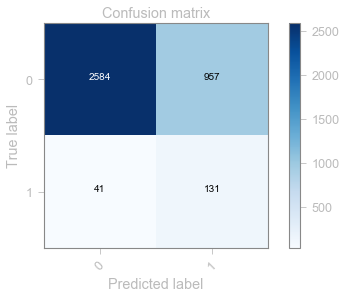

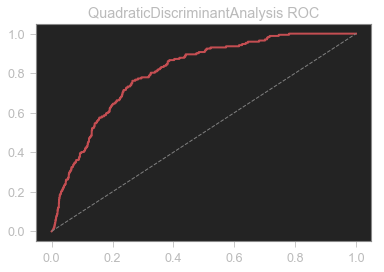

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

param_grid = {
    'priors':[2], 
    'reg_param':[0.911],
#     'tol':[0.0001]
}


LDA = GridSearchCV(QuadraticDiscriminantAnalysis(),param_grid,cv=sfk,scoring='roc_auc')
LDA.fit(train_x,train_y)

print("best score: %f \n best model: %s" % (LDA.best_score_, LDA.best_estimator_))

LDA_best = LDA.best_estimator_
train_score = LDA_best.score(train_x,train_y)
test_score = LDA_best.score(test_x,test_y)
y_pred = LDA_best.predict(test_x)
y_pred_prob = LDA_best.predict_proba(test_x)[:,1]
cm = confusion_matrix(test_y,y_pred)

eval_info(LDA_best,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)


In [202]:
# save model
import pickle
with open("./best_models/LDA_pkl.txt",'wb') as f:
    pickle.dump(LDA_best,f)

# cross-validation
from sklearn.cross_validation import cross_val_score
LDA_cv_auc = cross_val_score(LDA_best,X,y,cv=5,scoring="roc_auc")
print("best_LDA_cv_auc:",LDA_cv_auc)

F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
F:\Anaconda3\lib\site-packages\sklearn\base.py:115: DeprecationWarning: Estimator QuadraticDiscriminantAnalysis modifies par

best_LDA_cv_auc: [0.77966206 0.78624965 0.8102937  0.76345521 0.79018657]


F:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# label propagation

In [8]:
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
y = y.replace(0,-1)
train_x,test_x,train_y,test_y = train_test_split(X,y,stratify=y)
sfk = StratifiedKFold(n_splits=3,shuffle=True,random_state=111)
param_grid = {
    'kernel':['rbf','knn'],
#     'gamma':[20],
#     'n_neighbors':[7],
#     'alpha':[0.2],
#     'max_iter':[30],
}

LPG = GridSearchCV(LabelSpreading(),param_grid,cv=sfk,scoring='roc_auc')
LPG.fit(train_x,train_y)
LPG_best = LPG.best_estimators_
train_score = LPG_best.score(train_x,train_y)
test_score = LPG_best.score(test_x,test_y)
y_pred = LPG_best.predict(test_x)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

------LabelSpreading classification_report------
              precision    recall  f1-score   support

         -1       0.00      0.00      0.00      3541
          1       0.05      1.00      0.09       172

avg / total       0.00      0.05      0.00      3713



F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

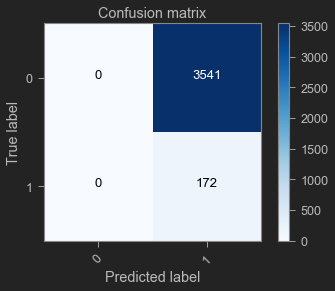

In [228]:
y_pred_prob = LPG.predict_proba(test_x)
cm = confusion_matrix(test_y,y_pred)

eval_info(LPG,test_y,y_pred_prob,cm)
print( "train_score:",train_score,"\n","test_score:",test_score)

# PCA

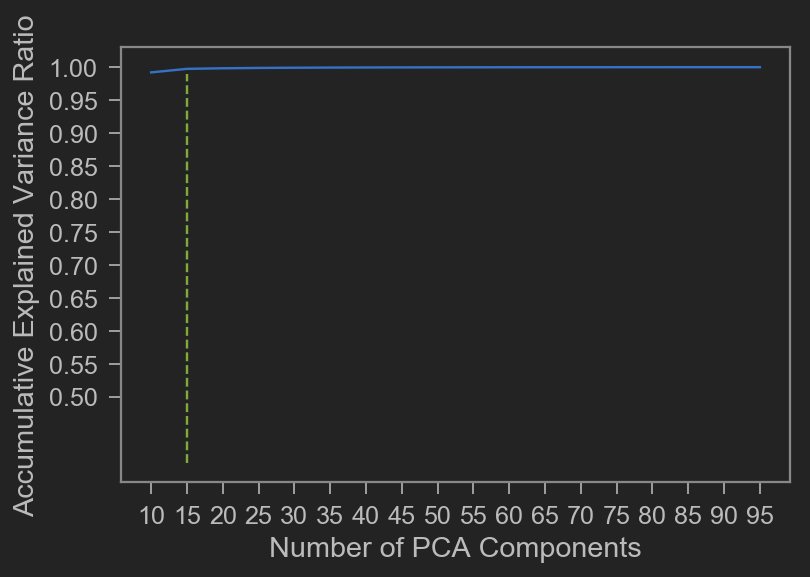

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
n_components = range(10,100,5)
acc_explained_ratio = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit_transform(X)
    acc_explained_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(6,4),dpi=144)
plt.plot(n_components,acc_explained_ratio)
plt.xlabel("Number of PCA Components")
plt.ylabel("Accumulative Explained Variance Ratio")
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(np.arange(0,100,5))
plt.plot((15,15),(0.4,0.99),"g--")
plt.show()

In [39]:
n_components = 15
pca_model = PCA(n_components=n_components).fit(train_x)
pca_train_x = pca_model.transform(train_x)
pca_test_x = pca_model.transform(test_x)
param_grid = {"C":[1,5,10,50],"gamma":[0.0001,0.0005,0.001,0.005,0.01],
              "kernel":["rbf"],"class_weight":["balanced"]}
SVC_PCA_model = GridSearchCV(SVC(),param_grid,verbose=2,n_jobs=4)
SVC_PCA_model.fit(pca_train_x,train_y)
print("-----SVM Classifier(PCA)------\n",
      "best param:{0}\nbest score:{1}".format(SVC_PCA_model.best_params_,SVC_PCA_model.best_score_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   54.7s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.5min finished


-----SVM Classifier(PCA)------
 best param:{'C': 50, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
best score:0.79575


In [41]:
y_pred = SVC_PCA_model.best_estimator_.predict(pca_test_x)
print("------Confusion Matrix------\n",confusion_matrix(test_y,y_pred))
print("-----Classification_report-----\n",classification_report(test_y,y_pred))

------Confusion Matrix------
 [[2281  585]
 [  78   56]]
-----Classification_report-----
              precision    recall  f1-score   support

          0       0.97      0.80      0.87      2866
          1       0.09      0.42      0.14       134

avg / total       0.93      0.78      0.84      3000



# K-Means

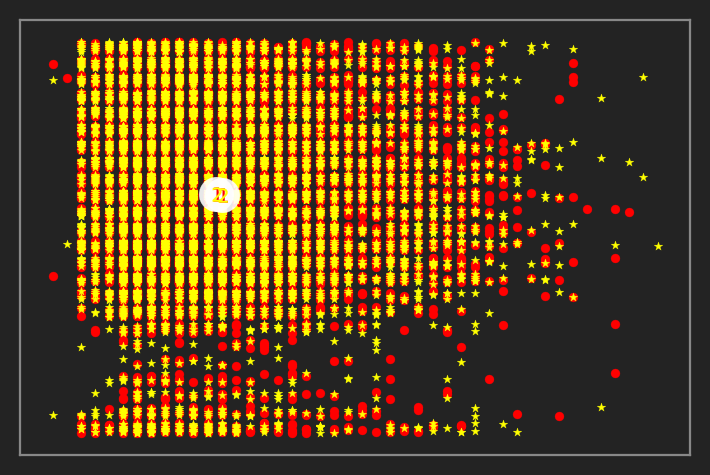

In [39]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(X)
kmean_score = kmean.score(X)

labels = kmean.labels_
centers = kmean.cluster_centers_
plt.figure(figsize=(6,4),dpi=144)
plt.xticks(())
plt.yticks(())
plt.scatter(X[labels==0].iloc[:,0],X[labels==0].iloc[:,1],marker="o",s=20,c="red")
plt.scatter(X[labels==1].iloc[:,0],X[labels==1].iloc[:,1],marker="*",s=20,c="yellow")
plt.scatter(centers[:,0],centers[:,1],marker="o",c="white",alpha=0.9,s=300)
plt.scatter(centers[:,0],centers[:,1],marker="$1$",c="red",s=50)
plt.scatter(centers[:,0],centers[:,1],marker="$2$",c="yellow",s=50)

In [40]:
from sklearn.metrics import adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score
AR_score = adjusted_rand_score(y,labels)
H_score = homogeneity_score(y,labels)
C_score = completeness_score(y,labels)
V_score = v_measure_score(y,labels)
print("Adjusted Rand-Index:",AR_score,"\n",
     "Homogeneity Score:",H_score,"\n",
     "Completeness Score:",C_score,"\n",
     "V-measure Score:",V_score)

Adjusted Rand-Index: 0.0027599712496652125 
 Homogeneity Score: 0.01662842545061333 
 Completeness Score: 0.004487396252852615 
 V-measure Score: 0.0070675283307278045


# KNN

------KNeighborsClassifier------
elaspe: 305.2950389313734 
 train_score: 0.9540508947037137 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


------KNeighborsClassifier------
elaspe: 305.5213248479308 
 train_score: 1.0 
 test_score: 0.953344120819849
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.25      0.01      0.01       171

avg / total       0.92      0.95      0.93      3708

auc: 0.5024998883978394
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3534    3]
 [ 170    1]]
------RadiusNeighborsClassifier------
elaspe: 436.63880084495827 
 train_score: 0.9538710547612624 
 test_score: 0.9538834951456311
------classification_report------
              precision    recall  f1-score   support

          0       0.95      1.00      0.98      3537
          1       0.00      0.00      0.00       171

avg / total       0.91      0.95      0.93      3708

auc: 0.5
auc: 0.7692927068401377
Confusion matrix, without normalization
[[3537    0]
 [ 171    0]]


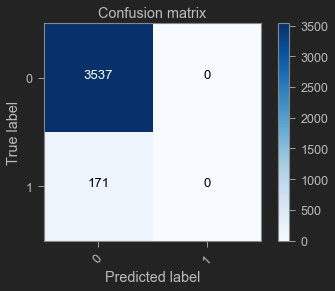

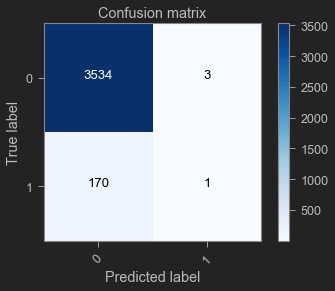

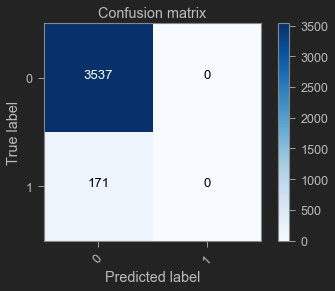

In [29]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=10)
knn_model2 = KNeighborsClassifier(n_neighbors=10,weights="distance")
knn_model3 = RadiusNeighborsClassifier(n_neighbors=10,radius=1000.0)

models = [knn_model1,knn_model2,knn_model3]
for knn in models:
    start = time.clock()
    knn.fit(train_x,train_y)
    train_score = knn.score(train_x,train_y)
    test_score = knn.score(test_x,test_y)
    y_pred = knn.predict(test_x)
    print("------"+knn.__class__.__name__+"------\n"
          "elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
    cm = confusion_matrix(test_y,y_pred)
    eval_info(test_y,y_pred,y_score,cm)

# naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import time

GNB = GaussianNB()
BNB = BernoulliNB()
# models = [GNB,BNB]
# for NB in models:
start = time.clock()
GNB.fit(train_x,train_y)
train_score = GNB.score(train_x,train_y)
test_score = GNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob1 = GNB.predict_proba(test_x)[:,1]

start = time.clock()
BNB.fit(train_x,train_y)
train_score = BNB.score(train_x,train_y)
test_score = BNB.score(test_x,test_y)
print("elaspe:",time.clock()-start,"\n",
          "train_score:",train_score,"\n",
          "test_score:",test_score)
# y_pred = GNB.predict(test_x)
y_pred_prob2 = BNB.predict_proba(test_x)[:,1]

y_pred_prob = y_pred_prob1 + y_pred_prob2
y_pred = np.where(y_pred_prob>0.5,1,0)

cm = confusion_matrix(test_y,y_pred)
eval_info(NB,test_y,y_pred_prob,cm)